# XGBoost + one hot encoding + scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/train.csv').drop(columns=['UID'])

In [3]:
df.info()   # non-null: 이상치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   주거 형태              10000 non-null  object 
 1   연간 소득              10000 non-null  float64
 2   현재 직장 근속 연수        10000 non-null  object 
 3   체납 세금 압류 횟수        10000 non-null  float64
 4   개설된 신용계좌 수         10000 non-null  int64  
 5   신용 거래 연수           10000 non-null  float64
 6   최대 신용한도            10000 non-null  float64
 7   신용 문제 발생 횟수        10000 non-null  int64  
 8   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 9   개인 파산 횟수           10000 non-null  int64  
 10  대출 목적              10000 non-null  object 
 11  대출 상환 기간           10000 non-null  object 
 12  현재 대출 잔액           10000 non-null  float64
 13  현재 미상환 신용액         10000 non-null  float64
 14  월 상환 부채액           10000 non-null  float64
 15  신용 점수              10000 non-null  int64  
 16  채무 불이행 여부          1000

In [4]:
Y = df['채무 불이행 여부']
X = df.drop('채무 불이행 여부', axis=1)

print(X)

                주거 형태      연간 소득 현재 직장 근속 연수  체납 세금 압류 횟수  개설된 신용계좌 수  \
0                  자가  1941337.5      10년 이상          0.0           9   
1                  월세  1979505.0      10년 이상          0.0           5   
2                  월세  1356381.0          4년          0.0          12   
3                  월세  1049017.5          6년          0.0          15   
4                  월세  4320217.5          2년          0.0          11   
...               ...        ...         ...          ...         ...   
9995  주택 담보 대출 (거주 중)  1339473.0      10년 이상          0.0           9   
9996  주택 담보 대출 (거주 중)  2297230.5          2년          0.0          11   
9997  주택 담보 대출 (거주 중)  1221523.5      10년 이상          0.0           9   
9998               자가  3343584.0      10년 이상          0.0          10   
9999  주택 담보 대출 (거주 중)  2175133.5          5년          0.0           5   

      신용 거래 연수   최대 신용한도  신용 문제 발생 횟수  마지막 연체 이후 경과 개월 수  개인 파산 횟수   대출 목적  \
0         13.4  400597.5            0        

In [5]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font)

In [6]:
# 원 핫 인코딩
categories = ['주거 형태', '현재 직장 근속 연수', '대출 목적', '대출 상환 기간']


X = pd.get_dummies(X, columns = categories, dtype=int) 

X

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,...,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,1941337.5,0.0,9,13.4,400597.5,0,24,1,390903.0,225457.5,...,0,0,0,0,0,0,0,0,1,0
1,1979505.0,0.0,5,15.1,360679.5,0,11,0,1002184.5,64749.0,...,0,0,0,0,0,0,0,0,1,0
2,1356381.0,0.0,12,18.8,491770.5,1,74,3,227775.0,487644.0,...,0,0,0,0,0,0,0,0,1,0
3,1049017.5,0.0,15,14.8,411546.0,1,22,1,251383.5,413211.0,...,0,0,0,0,0,0,0,0,1,0
4,4320217.5,0.0,11,26.1,895288.5,0,32,0,1163176.5,78991.5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.0,0.0,9,18.7,319027.5,0,68,0,126216.0,177028.5,...,0,0,0,0,0,0,0,0,1,0
9996,2297230.5,0.0,11,28.3,399799.5,0,7,0,371907.0,347449.5,...,0,0,0,0,0,1,0,0,0,1
9997,1221523.5,0.0,9,30.1,823305.0,0,14,0,869736.0,176905.5,...,0,0,0,0,0,0,0,0,0,1
9998,3343584.0,0.0,10,20.3,724314.0,0,25,0,443008.5,139294.5,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# 로그
cl = ['현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액']

for i in cl:
    X[i] = X[i].apply(lambda x: np.log1p(x))

X

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,...,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 목적_휴가 비용,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,1941337.5,0.0,9,13.4,400597.5,0,24,1,12.876217,12.325891,...,0,0,0,0,0,0,0,0,1,0
1,1979505.0,0.0,5,15.1,360679.5,0,11,0,13.817694,11.078289,...,0,0,0,0,0,0,0,0,1,0
2,1356381.0,0.0,12,18.8,491770.5,1,74,3,12.336118,13.097343,...,0,0,0,0,0,0,0,0,1,0
3,1049017.5,0.0,15,14.8,411546.0,1,22,1,12.434739,12.931716,...,0,0,0,0,0,0,0,0,1,0
4,4320217.5,0.0,11,26.1,895288.5,0,32,0,13.966666,11.277108,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.0,0.0,9,18.7,319027.5,0,68,0,11.745758,12.084072,...,0,0,0,0,0,0,0,0,1,0
9996,2297230.5,0.0,11,28.3,399799.5,0,7,0,12.826402,12.758377,...,0,0,0,0,0,1,0,0,0,1
9997,1221523.5,0.0,9,30.1,823305.0,0,14,0,13.675946,12.083377,...,0,0,0,0,0,0,0,0,0,1
9998,3343584.0,0.0,10,20.3,724314.0,0,25,0,13.001346,11.844353,...,0,0,0,0,0,0,0,0,1,0


In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [9]:
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=5, 
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [10]:
# 예측
y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

# 평가 (accuracy_score 사용)
print("훈련 데이터 정확도:\n", accuracy_score(y_train, y_pred_train))
print("훈련 데이터 정밀도:\n", precision_score(y_train, y_pred_train))
print("훈련 데이터 재현율:\n", recall_score(y_train, y_pred_train))

print('='*30)

print("평가 데이터 정확도:\n", accuracy_score(y_test, y_pred_test))
print("평가 데이터 정밀도:\n", precision_score(y_test, y_pred_test))
print("평가 데이터 재현율:\n", recall_score(y_test, y_pred_test))

훈련 데이터 정확도:
 0.7988
훈련 데이터 정밀도:
 0.7928858290304074
훈련 데이터 재현율:
 0.5462450592885375
평가 데이터 정확도:
 0.7184
평가 데이터 정밀도:
 0.6618181818181819
평가 데이터 재현율:
 0.4126984126984127


In [12]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.7988
0.7184
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1618
           1       0.66      0.41      0.51       882

    accuracy                           0.72      2500
   macro avg       0.70      0.65      0.66      2500
weighted avg       0.71      0.72      0.70      2500



In [13]:
# XGBClassifier에 조기종료 적용 -> 과적합 방지, 훈련시간 단축
xgb_clf = XGBClassifier(
    n_estimators=500,
    max_depth=5, 
    learning_rate=0.1,
    random_state=0,
    early_stopping_rounds=10,   # 성능이 일정 횟수 이상 향상되지 않으면 조기종료 (반복을 중단할 횟수)
    eval_metrics='logloss'
    )

In [14]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)
# eval_set: 검증 데이터, verbose: 학습 중 평가 결과 출력 여부

[0]	validation_0-logloss:0.62454	validation_1-logloss:0.62788
[1]	validation_0-logloss:0.61235	validation_1-logloss:0.61791
[2]	validation_0-logloss:0.60184	validation_1-logloss:0.60924
[3]	validation_0-logloss:0.59329	validation_1-logloss:0.60192
[4]	validation_0-logloss:0.58560	validation_1-logloss:0.59584
[5]	validation_0-logloss:0.57837	validation_1-logloss:0.59149
[6]	validation_0-logloss:0.57198	validation_1-logloss:0.58692
[7]	validation_0-logloss:0.56627	validation_1-logloss:0.58355
[8]	validation_0-logloss:0.56114	validation_1-logloss:0.58074
[9]	validation_0-logloss:0.55538	validation_1-logloss:0.57828
[10]	validation_0-logloss:0.55026	validation_1-logloss:0.57565
[11]	validation_0-logloss:0.54583	validation_1-logloss:0.57370
[12]	validation_0-logloss:0.54178	validation_1-logloss:0.57213
[13]	validation_0-logloss:0.53748	validation_1-logloss:0.57069
[14]	validation_0-logloss:0.53403	validation_1-logloss:0.56845
[15]	validation_0-logloss:0.53035	validation_1-logloss:0.56602
[1

c:\Users\dltjs\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [00:48:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_metrics" } are not used.

  self.starting_round = model.num_boosted_rounds()


[44]	validation_0-logloss:0.46903	validation_1-logloss:0.55484
[45]	validation_0-logloss:0.46723	validation_1-logloss:0.55455
[46]	validation_0-logloss:0.46574	validation_1-logloss:0.55463
[47]	validation_0-logloss:0.46507	validation_1-logloss:0.55449
[48]	validation_0-logloss:0.46379	validation_1-logloss:0.55440
[49]	validation_0-logloss:0.46205	validation_1-logloss:0.55417
[50]	validation_0-logloss:0.46171	validation_1-logloss:0.55407
[51]	validation_0-logloss:0.46024	validation_1-logloss:0.55385
[52]	validation_0-logloss:0.45948	validation_1-logloss:0.55375
[53]	validation_0-logloss:0.45837	validation_1-logloss:0.55390
[54]	validation_0-logloss:0.45796	validation_1-logloss:0.55379
[55]	validation_0-logloss:0.45670	validation_1-logloss:0.55380
[56]	validation_0-logloss:0.45534	validation_1-logloss:0.55383
[57]	validation_0-logloss:0.45479	validation_1-logloss:0.55352
[58]	validation_0-logloss:0.45407	validation_1-logloss:0.55320
[59]	validation_0-logloss:0.45318	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, ...)

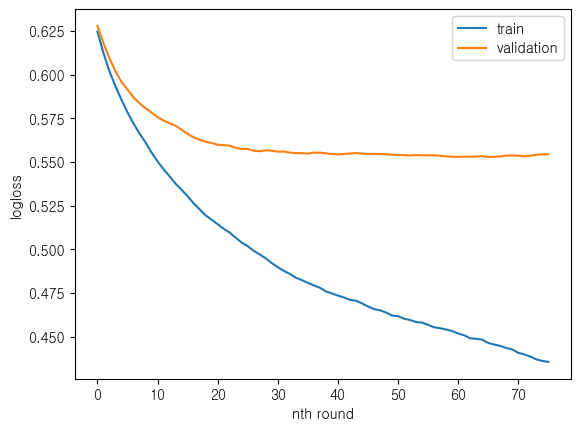

In [15]:
# 훈련 과정 시각화
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.legend
plt.show()

In [16]:
# 최적 파라미터 찾기
import optuna
import xgboost as xgb

# Optuna 최적화 함수 정의
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    params = {
        'objective': 'binary:logistic',  # 이진 분류
        'eval_metric': 'logloss',  # 손실 함수
        'booster': 'gbtree',  # 기본 부스터
        'max_depth': trial.suggest_int('max_depth', 3, 10),  # 트리 깊이
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  # 학습률
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),  # 트리 개수
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # 데이터 샘플링 비율
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # 피처 샘플링 비율
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),  # L1 정규화
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),  # L2 정규화
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),  # 리프 노드 분할 시 최소 손실 감소량
    }

    # XGBoost 모델 학습
    model = xgb.XGBClassifier(**params, use_label_encoder=False)
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # 높은 정확도를 목표로 최적화

# Optuna 스터디 생성 및 최적화 수행
study = optuna.create_study(direction='maximize')  # 정확도를 높이는 방향으로 최적화
study.optimize(objective, n_trials=1000)  # 50번 시도

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", study.best_params)

# 최적의 하이퍼파라미터로 모델 학습
best_params = study.best_params
best_model = xgb.XGBClassifier(**best_params, use_label_encoder=False)
best_model.fit(X_train, y_train)

# 최적 모델 평가
y_pred_best = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)
print("Final Model Accuracy:", final_accuracy)

[I 2025-03-19 00:48:31,583] A new study created in memory with name: no-name-f4b593d7-ee94-4d8e-b8bf-35adf118d6d0
c:\Users\dltjs\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:48:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-03-19 00:48:31,696] Trial 0 finished with value: 0.7148 and parameters: {'max_depth': 7, 'learning_rate': 0.2251180157271257, 'n_estimators': 115, 'subsample': 0.5425801741755567, 'colsample_bytree': 0.8159436698423865, 'reg_alpha': 2.096676255275556, 'reg_lambda': 8.447193998282096, 'gamma': 3.678261734758908}. Best is trial 0 with value: 0.7148.
c:\Users\dltjs\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:48:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, ite

Best Hyperparameters: {'max_depth': 5, 'learning_rate': 0.09976068728329174, 'n_estimators': 535, 'subsample': 0.5457055989159076, 'colsample_bytree': 0.9727094003502108, 'reg_alpha': 6.45550321235626, 'reg_lambda': 3.457148566236242, 'gamma': 2.9296956909032517}
Final Model Accuracy: 0.7324


In [17]:
# 예측
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

# 평가 (accuracy_score 사용)
print("훈련 데이터 정확도:\n", accuracy_score(y_train, y_pred_train))
print("훈련 데이터 정밀도:\n", precision_score(y_train, y_pred_train))
print("훈련 데이터 재현율:\n", recall_score(y_train, y_pred_train))

print('='*30)

print("평가 데이터 정확도:\n", accuracy_score(y_test, y_pred_test))
print("평가 데이터 정밀도:\n", precision_score(y_test, y_pred_test))
print("평가 데이터 재현율:\n", recall_score(y_test, y_pred_test))

훈련 데이터 정확도:
 0.7585333333333333
훈련 데이터 정밀도:
 0.7096209912536443
훈련 데이터 재현율:
 0.4810276679841897
평가 데이터 정확도:
 0.7324
평가 데이터 정밀도:
 0.6939890710382514
평가 데이터 재현율:
 0.43197278911564624
